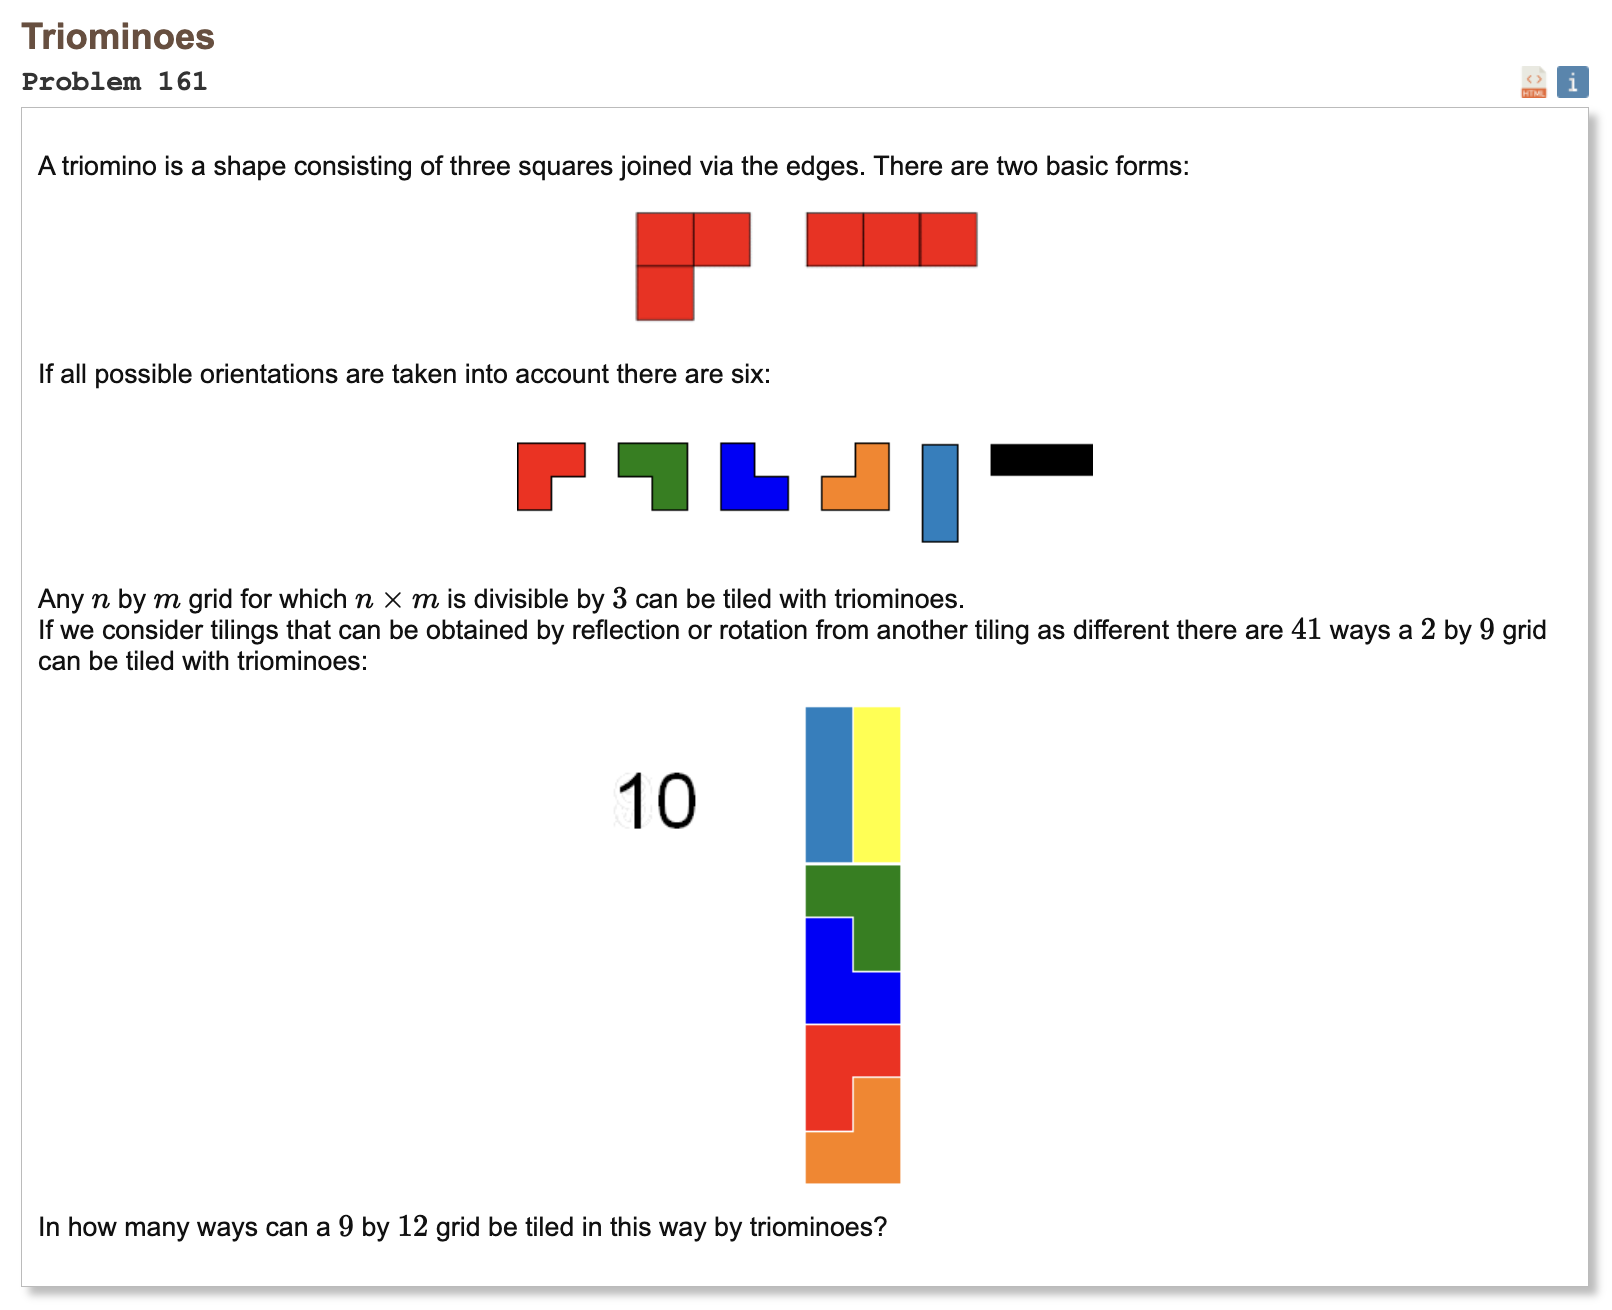

## Initial approach

* tile a 9x12 board using both straight and L-shaped triominoes
* every placement must stay inside bounds and not overlap used cells
* fill the grid column by column, tracking which cells in three columns are occupied
* if the first column in that window is full, slide the window right
* for each state, try every shape that fits the first empty cell
* store already seen states manually in a dictionary instead of using lru_cache
* key the dictionary by (column, m0, m1, m2) and return stored values if found

In [1]:
%%time

H, W = 9, 12
FULL = (1 << H) - 1

shapes = []
shapes.append([(0, 0), (0, 1), (0, 2)])
shapes.append([(0, 0), (1, 0), (2, 0)])
shapes.append([(0, 0), (0, 1), (1, 0)])
shapes.append([(0, 0), (1, 0), (1, 1)])
shapes.append([(0, 0), (0, 1), (1, 1)])
shapes.append([(0, 0), (0, -1), (1, 0)])
shapes.append([(0, 0), (1, -1), (1, 0)])
shapes.append([(0, 0), (0, -1), (1, -1)])

def in_bounds(col, row, dx, dy):
    nc = col + dx
    nr = row + dy
    return 0 <= nc < W and 0 <= nr < H

def set_bit(mask, r):
    return mask | (1 << r)

def is_free(mask, r):
    return ((mask >> r) & 1) == 0

memo = {}

def dp(col, m0, m1, m2):
    key = (col, m0, m1, m2)
    if key in memo:
        return memo[key]

    while m0 == FULL:
        if col == W - 1:
            val = 1 if m1 == 0 and m2 == 0 else 0
            memo[key] = val
            return val
        col += 1
        m0, m1, m2 = m1, m2, 0
        key = (col, m0, m1, m2)
        if key in memo:
            return memo[key]

    r = 0
    while (m0 >> r) & 1:
        r += 1

    total = 0
    for shape in shapes:
        ok = True
        nm0, nm1, nm2 = m0, m1, m2
        for dx, dy in shape:
            if not in_bounds(col, r, dx, dy):
                ok = False
                break
            cc = dx
            rr = r + dy
            if cc == 0:
                if not is_free(nm0, rr):
                    ok = False
                    break
                nm0 = set_bit(nm0, rr)
            elif cc == 1:
                if not is_free(nm1, rr):
                    ok = False
                    break
                nm1 = set_bit(nm1, rr)
            else:
                if not is_free(nm2, rr):
                    ok = False
                    break
                nm2 = set_bit(nm2, rr)
        if ok:
            total += dp(col, nm0, nm1, nm2)

    memo[key] = total
    return total

result = dp(0, 0, 0, 0)
print("Result:", result)

Result: 20574308184277971
CPU times: user 940 ms, sys: 14.6 ms, total: 954 ms
Wall time: 953 ms
